# Introdución al procesamiento de lenguaje natural
Este notebook es parte de una serie que busca introducir los problemas y posibles alteranativas de solución que se presentan en procesamiento de lenguaje natural (NLP).
Esta primera etapa busca familiarizarse con las librerías fundamentales de NLP, entender los niveles del lenguaje que marcan el análisis de NLP, y trabajar en un primer prototipo de representación textual: El Wordcloud

In [1]:
import os, re, string, collections, random

La librería fundamental para probar el análisis de texto es NLTK

In [2]:
import nltk

Una de las librería líderes para poner NLP en producción es spacy

In [3]:
import spacy

## Importación de un documento como corpus
###Archivos de texto "txt"
Para la importación de txt, basta con abrir y leer el archivo.
Para documentos en español es clave el uso de la codificación (*encoding*) correcta.
UTF-8 suele ser funcional, pero una más amplia es latin-1

In [4]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
abre = open("nuevo_testamento_valera.txt", encoding="UTF-8")
base = abre.read()
type(base)
base[:1000]

'\ufeffThe Project Gutenberg EBook of Reina Valera New Testament of the Bible 1909, by \nAnonymous\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Reina Valera New Testament of the Bible 1909\n\nAuthor: Anonymous\n\nPosting Date: October 26, 2012 [EBook #5881]\nRelease Date: June, 2004\nFirst Posted: September 15, 2002\n\nLanguage: Spanish\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK REINA VALERA NEW TESTAMENT 1909 ***\n\n\n\n\nProduced by an anonymous Project Gutenberg volunteer.\n\n\n\n\n\n\n\n\n\n\nLa Valera 1909 de la SBBE y la SBA.\n\n\n\nAviso:\n\nEste texto del Nuevo Testamento (Valera 1909) fue bajado de la pagina de web:\nAntigua Versión Valera 1909 \x96 La palabra de Dios en español.\n(www.valera1909.com)  Este texto no tiene derechos reservados, puedes\ndist

El archivo es leido como una cadena (*string*)

In [6]:
len(base)

181152

Como podrá observarse, en general los archivos requieren limpieza para tener el texto deseado. En este caso, hay prefacios e introducciones que no hacen parte del nuevo testamento

In [7]:
base[0:100]

'\ufeffThe Project Gutenberg EBook of Reina Valera New Testament of the Bible 1909, by \nAnonymous\n\nThis eB'

Una limpieza inicial incluye marcar el verdadero inicio y final del texto de interés

In [8]:
init = base.find("HEBREO Y GRIEGO")
finale = base.find("The first pass")
base = base[init:finale]
len(base)

156999

In [9]:
base[0:2000]

'HEBREO Y GRIEGO\n\n\n\nCapítulo  1\n\n        1 EN el principio era el Verbo, y el Verbo era con Dios, y el Verbo era\nDios.\n\n        2 Este era en el principio con Dios.\n\n        3 Todas las cosas por él fueron hechas; y sin él nada de lo que es\nhecho, fué hecho.\n\n        4 En él estaba la vida, y la vida era la luz de los hombres.\n\n        5 Y la luz en las tinieblas resplandece; mas las tinieblas no la\ncomprendieron.\n\n        6 Fué un hombre enviado de Dios, el cual se llamaba Juan.\n\n        7 Este vino por testimonio, para que diese testimonio de la luz, para\nque todos creyesen por él.\n\n        8 No era él la luz, sino para que diese testimonio de la luz.\n\n        9 [Aquél] era la luz verdadera, que alumbra á todo hombre que viene á\neste mundo.\n\n        10 En el mundo estaba, y el mundo fué hecho por él; y el mundo no le\nconoció.\n\n        11 A lo suyo vino, y los suyos no le recibieron.\n\n        12 Mas á todos los que le recibieron, dióles potestad de se

Después de eso, resulta claro que hay elementos en el texto que no son deseados. Ocurre mucho también con redes sociales y páginas web (en nuestro caso se trata de los tabuladores y cambios de párrafo). La forma usual de retirarlos es con el uso de *expresiones regulares*

In [10]:
base2 = re.sub ("\s"," ",base)
base2[0:2000]

'HEBREO Y GRIEGO    Capítulo  1          1 EN el principio era el Verbo, y el Verbo era con Dios, y el Verbo era Dios.          2 Este era en el principio con Dios.          3 Todas las cosas por él fueron hechas; y sin él nada de lo que es hecho, fué hecho.          4 En él estaba la vida, y la vida era la luz de los hombres.          5 Y la luz en las tinieblas resplandece; mas las tinieblas no la comprendieron.          6 Fué un hombre enviado de Dios, el cual se llamaba Juan.          7 Este vino por testimonio, para que diese testimonio de la luz, para que todos creyesen por él.          8 No era él la luz, sino para que diese testimonio de la luz.          9 [Aquél] era la luz verdadera, que alumbra á todo hombre que viene á este mundo.          10 En el mundo estaba, y el mundo fué hecho por él; y el mundo no le conoció.          11 A lo suyo vino, y los suyos no le recibieron.          12 Mas á todos los que le recibieron, dióles potestad de ser hechos hijos de Dios, á los que 

Algunas limpiezas pueden ser más polémicas, pues los signos de puntuación tienen potencial de significado en el texto

In [ ]:
base3 = re.sub('\/|\\|\.|\,|\;|\:|\n|\?|\)|\(|\!|\¡|\¿|\'|\t', ' ', base2)
base3[0:2000]


Unificar los textos en minúsculas sule funcionar bastante bien, aunque puede dificultar la identificación de nombres propios

In [11]:
base=base2.lower()
base[1:850]

'ebreo y griego    capítulo  1          1 en el principio era el verbo, y el verbo era con dios, y el verbo era dios.          2 este era en el principio con dios.          3 todas las cosas por él fueron hechas; y sin él nada de lo que es hecho, fué hecho.          4 en él estaba la vida, y la vida era la luz de los hombres.          5 y la luz en las tinieblas resplandece; mas las tinieblas no la comprendieron.          6 fué un hombre enviado de dios, el cual se llamaba juan.          7 este vino por testimonio, para que diese testimonio de la luz, para que todos creyesen por él.          8 no era él la luz, sino para que diese testimonio de la luz.          9 [aquél] era la luz verdadera, que alumbra á todo hombre que viene á este mundo.          10 en el mundo estaba, y el mundo fué hecho por él; y el mundo no le conoció.          11'

###Importar datos de redes sociales
En general las redes sociales solo están abiertas a aquello que la cuenta puede acceder; sin embargo Twitter ha sido una red abierta por excelencia, y es por ello una de las más usadas para extraer esa información

In [12]:
!pip install tweepy

In [13]:
import tweepy

para usar las API de twitter hay que tener una cuenta de desarrollador, con sus propias claves, y autenticarse.

In [ ]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''


##autenticarse
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


después de ello, hay que conocer el lenguaje de búsquedas para extraer los trinos requeridos.

In [ ]:
busqueda="cerveza + ambiente -filter:retweets"
desde="2020-01-01"

trinos=tweepy.Cursor(api.search,q=busqueda,lang="es",since=desde).items(50)


Luego pasamos los trinos a una lista, y podemos observar nuevos desafíos de limpieza, como las páginas web y las menciones.

In [ ]:
guardainfo = [[trino.user.screen_name, trino.user.location, trino.text] for trino in trinos]
guardainfo[0:5]

las expresiones regulares ayudan entonces a limpiar esas páginas web

In [ ]:
guardatrino = [trino[2] for trino in guardainfo]
guardatrino2= [re.sub("(\w+:\/\/\S+)", "", trino) for trino in guardatrino]
#cualquier palabra que tenga lo que sea (uno o más) seguido de dos puntos , slash y hasta que terminen los no blancos 
# otra opciion
guardatrino3= [re.sub("(http\S+)", "", trino) for trino in guardatrino2]
guardatrino3[0:5]


In [ ]:
import pandas as pd
tweet_df = pd.DataFrame(data=guardainfo, 
                    columns=['usuario', "ubicacion","texto"])
tweet_df.head(10)


###Importación de PDFs

Para PDFs usamos un proyecto libre de Apache, y nos conectamos a él. Si se trata de PDFs con imagen es más complicado.

In [14]:
#from google.colab import files
#uploaded = files.upload()

In [15]:
!pip install tika

  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32884 sha256=4e2ba676c46ce80fb0eae6f3352367d76c03920a9674aee077e016b30703d7ce
  Stored in directory: c:\users\villacorta\appdata\local\pip\cache\wheels\75\66\8b\d1acbac7d49f3d98ade76c51ae5d72cec1866131a3b1ad9f82
Successfully built tika


In [17]:
import tika
from tika import parser

pdfbase = parser.from_file("survey_sentiment.pdf")
textopdf = str(pdfbase.values()).lower()
textopdf[4000:6000]

'y on opinion mining and sentiment analysis: tasks, approaches and applications\\n\\n\\nknowledge-based systems 89 (2015) 14–46\\ncontents lists available at sciencedirect\\n\\nknowledge-based systems\\n\\njournal homepage: www.elsevier .com/locate /knosys\\na survey on opinion mining and sentiment analysis: tasks, approaches\\nand applications\\nhttp://dx.doi.org/10.1016/j.knosys.2015.06.015\\n0950-7051/� 2015 elsevier b.v. all rights reserved.\\n\\n⇑ corresponding author. tel.: +91 40 23294042; fax: +91 40 23535157.\\ne-mail addresses: ankitaravi.ravi00@gmail.com (k. ravi), rav_padma@yahoo.\\n\\ncom (v. ravi).\\nkumar ravi a,b, vadlamani ravi a,⇑\\na center of excellence in crm and analytics, institute for development and research in banking technology, castle hills road no. 1, masab tank, hyderabad 500057, ap, india\\nb school of computer & information sciences, university of hyderabad, hyderabad 500046, ap, india\\n\\na r t i c l e i n f o\\narticle history:\\nreceived 28 january 2

## Preparación de datos (para wordcloud)
Inicialmente es necesario separar el texto  (**tokenizar**)  en las unidades mínimas que nos sirven, en este caso, para un wordcloud: las palabras

In [18]:
nltk.download("punkt")
fichas2 = nltk.tokenize.word_tokenize(base, language="spanish")
len(fichas2)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Villacorta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


32808

In [19]:
type(fichas2)

list

In [22]:
print(fichas2[0:100])

['hebreo', 'y', 'griego', 'capítulo', '1', '1', 'en', 'el', 'principio', 'era', 'el', 'verbo', ',', 'y', 'el', 'verbo', 'era', 'con', 'dios', ',', 'y', 'el', 'verbo', 'era', 'dios', '.', '2', 'este', 'era', 'en', 'el', 'principio', 'con', 'dios', '.', '3', 'todas', 'las', 'cosas', 'por', 'él', 'fueron', 'hechas', ';', 'y', 'sin', 'él', 'nada', 'de', 'lo', 'que', 'es', 'hecho', ',', 'fué', 'hecho', '.', '4', 'en', 'él', 'estaba', 'la', 'vida', ',', 'y', 'la', 'vida', 'era', 'la', 'luz', 'de', 'los', 'hombres', '.', '5', 'y', 'la', 'luz', 'en', 'las', 'tinieblas', 'resplandece', ';', 'mas', 'las', 'tinieblas', 'no', 'la', 'comprendieron', '.', '6', 'fué', 'un', 'hombre', 'enviado', 'de', 'dios', ',', 'el', 'cual']


Una buena opción es crear un libro de NLTK, el cual permite manipulaciones especiales.

In [23]:
libro1 = nltk.Text(fichas2)
libro1.count("amor")

11

por ejemplo, puedo obtener el conjunto de palabras del libro

In [24]:
len(set(libro1))

3205

In [25]:
len(libro1)

32808

solo con esto, ya podemos obtener la diversidad léxica, una medida que puede ser útil en algunos contextos.

In [26]:
len(set(libro1))/len(libro1)


0.09768958790538892

ya podemos hacer nuestro primer wordcloud

In [27]:
import numpy, matplotlib
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

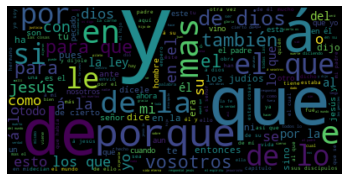

None

In [28]:
nubea = WordCloud()
nubea.generate(base)
plt.figure()
plt.imshow(nubea, interpolation="bilinear")
plt.axis("off")
figura=plt.show()
display(figura)

## Stopwords
Como resulta evidente, las solas palabras no nos muestran un resumen del texto, pues hay palabras muy frecuentes que solo ayudan a "conectar" el lenguaje, y no son relevantes para el documento específico. NLTK tiene una lista de ellas, pero los stopwords pueden variar según el problema a la mano.

In [30]:
nltk.download("stopwords")
from nltk.corpus import stopwords
print(stopwords.words("spanish"))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Villacorta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
len(stopwords.words("spanish"))

313

En nuestro caso, por ejemplo, es necesario agregar unos stopwords.

In [32]:
misstop = stopwords.words("spanish")+["á","Y"]

Filtramos los stopwords, es decir, los retiramos de nuestro texto.

In [33]:
filtra=[word for word in fichas2 if word not in misstop]
len(filtra)
total=" ".join(filtra)


y creamos el wordcloud ya sin stopwords

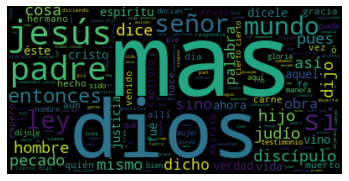

None

In [34]:
nubeb=WordCloud()
nubeb.generate(total)
plt.figure()
plt.imshow(nubeb, interpolation="bilinear")
plt.axis("off")
figura2=plt.show()
display(figura2)

##Lemas: en busca del significado

Como vemos en el wordcloud, algunas derivaciones de palabras (por ejemplo, conjugaciones de verbo: dijo, dijeron, o singulares y plurales) disminuyen la capacidad del wordcloud de transmitir los términos esenciales del documento. Por ello es posible utilizar algun tipo de raíz o fuente de esos términos como una opción para ampliar la interpretabilidad. Hay dos opciones fundamentales: obtener el lema de la palabra (la palabra base de diccionario) o tratar de "cortar" la palabra en su raíz. Estas opciones aumentan la exhaustividad, aunque disminuyan la precisión.

Para desarrollar el uso de lemas utilizaremos la librería spacy. Para ello es necesario importar su modelo en español y cargarlo.

In [35]:
spacy.cli.download("es")

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
C:\ProgramData\Anaconda3\lib\site-packages\es_core_news_sm -->
C:\Users\Villacorta\AppData\Roaming\Python\Python38\site-packages\spacy\data\es
You can now load the model via spacy.load('es')


Después le aplicamos el modelo a nuestro libro del nuevo testamento

In [36]:
nlp = spacy.load("es_core_news_sm")

In [37]:
doc1 = nlp(base)

#### Una vez ejecutamos el modelo, podemos obtener una gran cantidad de información para diferentes *tokens* del texto (palabras, frases, frases nominales). En este caso, usando como *tokens* las palabras, obtenemos su lema, si es o no un stopword, si es no un signo de puntuación y si es alfanumérico.

In [38]:
morfo=[]
for x in range(1,len(doc1)):
    morfo.append([doc1[x].text, doc1[x].lemma_,doc1[x].is_stop, doc1[x].is_punct, doc1[x].is_alpha])
morfo[100:120]


[['hombre', 'hombre', False, False, True],
 ['enviado', 'enviar', False, False, True],
 ['de', 'de', True, False, True],
 ['dios', 'dios', False, False, True],
 [',', ',', False, True, False],
 ['el', 'el', True, False, True],
 ['cual', 'cual', True, False, True],
 ['se', 'se', True, False, True],
 ['llamaba', 'llamar', False, False, True],
 ['juan', 'juan', False, False, True],
 ['.', '.', False, True, False],
 ['         ', '         ', False, False, False],
 ['7', '7', False, False, False],
 ['este', 'este', True, False, True],
 ['vino', 'venir', False, False, True],
 ['por', 'por', True, False, True],
 ['testimonio', 'testimoniar', False, False, True],
 [',', ',', False, True, False],
 ['para', 'parir', True, False, True],
 ['que', 'que', True, False, True]]

Para crear el wordcloud creamos una base de datos de pandas.

In [40]:
import pandas as pd

In [41]:
palabras = pd.DataFrame(morfo)
palabras.head(20)

,0,1,2,3,4
0,y,y,False,False,True
1,griego,griego,False,False,True
2,,,False,False,False
3,capítulo,capítulo,False,False,True
4,,,False,False,False
5,1,1,False,False,False
6,,,False,False,False
7,1,1,False,False,False
8,en,en,True,False,True
9,el,el,True,False,True


Filtramos las palabras que son stopwords (para spacy), los signos de puntuación y los números.

In [43]:
#quitar stopwords
palabras = palabras[palabras[2] == False]
#quitar puntuacion
palabras = palabras[palabras[3] == False]
##quitar números
palabras = palabras[palabras[4] == True]
palabras.head(20)

,0,1,2,3,4
0,y,y,False,False,True
1,griego,griego,False,False,True
3,capítulo,capítulo,False,False,True
10,principio,principiar,False,False,True
13,verbo,verbo,False,False,True
15,y,y,False,False,True
17,verbo,verbo,False,False,True
20,dios,dios,False,False,True
22,y,y,False,False,True
24,verbo,verbo,False,False,True


Después seguimos el proceso usual de contar tokens. Inicialmente vamos a contar las palabras, no los lemas.

In [44]:
contapal=pd.value_counts(palabras[0])
contapal2=contapal.to_frame()
contapal2.columns=["conteo"]
contapal2.index.name="entidad"
contapal2["palabra"]=contapal2.index
contapal2.head(20)

,conteo,palabra
entidad,,
y,1237,y
á,705,á
jesús,271,jesús
dios,235,dios
padre,147,padre
señor,100,señor
ley,93,ley
mundo,88,mundo
hijo,71,hijo


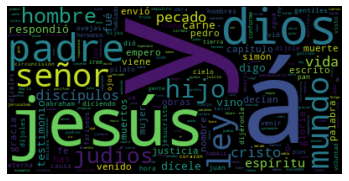

None

In [45]:
diccio={}
for freq,name in contapal2.values:
    diccio[name]=freq

nube = WordCloud()
nube.generate_from_frequencies(frequencies=diccio)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")

figura3=plt.show()
display(figura3)

En el resultado es claro que la reducción de stopwords de spacy no es completa. Vamos a completarla con los stopwords de NLTK para ver el wordcloud

In [46]:
for word in misstop:
    nlp.vocab[word].is_stop=True

doc1=nlp(base)


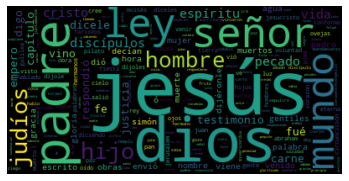

None

In [47]:
#extraer de spacy
morfo=[]
for x in range(1,len(doc1)):
    morfo.append([doc1[x].text, doc1[x].lemma_,doc1[x].is_stop, doc1[x].is_punct, doc1[x].is_alpha])
#volver dataframe
palabras=pd.DataFrame(morfo)
#quitar stopwords
palabras=palabras[palabras[2]==False]
#quitar puntuacion
palabras=palabras[palabras[3]==False]
##quitar números
palabras=palabras[palabras[4]==True]
#contar palabras y alinear índice
contapal=pd.value_counts(palabras[0])
contapal2=contapal.to_frame()
contapal2.columns=["conteo"]
contapal2.index.name="entidad"
contapal2["palabra"]=contapal2.index
#crear diccionario de frecuencias
diccio={}
for freq,name in contapal2.values:
    diccio[name]=freq
#crear el wordcloud
nube = WordCloud()
nube.generate_from_frequencies(frequencies=diccio)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
figure4=plt.show()
display(figure4)


    
    

Aqui ya resulta claro que los sustantivos se destacan más que los verbos, por el problema de las conjugaciones (digo, dícele...)
En el siguiente wordcloud cambiamos la palabra por el lema.

In [48]:
contal=pd.value_counts(palabras[1])
contal2=contal.to_frame()
contal2.head(10)
contal2.columns=["conteo"]
contal2.index.name="entidad"
contal2.index[1]


contal2["palabra"]=contal2.index
contal2.head(50)
diccio2={}
for freq,name in contal2.values:
    diccio2[name]=freq

contal=pd.value_counts(palabras[1])
contal2=contal.to_frame()
contal2.head(10)
contal2.columns=["conteo"]
contal2.index.name="entidad"
contal2["palabra"]=contal2.index
contal2.head(50)
diccio2={}
for freq,name in contal2.values:
    diccio2[name]=freq




Adicional a ello, incrustamos el wordcloud en una imagen

In [49]:
#from google.colab import files
#uploaded = files.upload()

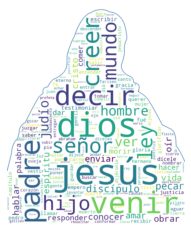

None

In [50]:
from PIL import Image
jesus_mask = numpy.array(Image.open("jesus_6.png"))
nube = WordCloud(background_color="white", mask=jesus_mask,contour_width=3, contour_color='steelblue')
nube.generate_from_frequencies(frequencies=diccio2)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
figure5=plt.show()
display(figure5)

El resultado muestra ahora como más importantes los verbos decir, creer y venir, que son claves en el análisis del nuevo testamento.

El uso de lemas es intensivo en cómputo. Una alternativa cuando el volumen es un problema es cortar las palabras por su raíz (stemming). Este mecanismo es mucho más rápido, pero tambien bastante menos precisos, y genera ambiguedades y dificultades, como veremos aquí. Primero obtenemos esas raíces:

In [51]:
##NLTK solo stemming
from nltk.stem.snowball import SnowballStemmer
raices=SnowballStemmer("spanish")
raizevan=[raices.stem(t) for t in filtra]
len(set(raizevan))



1813

Luego generamos el wordcloud con esas raíces.

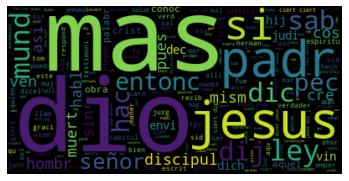

None

In [52]:

total2=" ".join(raizevan)

nubeb=WordCloud()
nubeb.generate(total2)
plt.figure()
plt.imshow(nubeb, interpolation="bilinear")
plt.axis("off")
figure6=plt.show()
display(figure6)



##En busca de los conceptos: n-gramas, PMI, collocations
En ocasiones, palabras que co-ocurren representan conceptos (p.e., "hijo del hombre") Esta co-ocurrencia debe ocurrir con más frecuencia de lo esperado, lo cual se obtiene gracias al *Pointwise Mutual Information* o PMI
Trabajaremos con la co-ocurrencia en n-gramas (grupos de n palabras).

In [53]:
fichas=nltk.tokenize.word_tokenize(base,language="spanish")
libro3a=nltk.Text(fichas)


In [54]:
from nltk.collocations import *
from nltk import bigrams

Primero obtenemos los PMI

In [55]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#sacar los bigramas
finder = BigramCollocationFinder.from_words(libro3a)
#filtar por más de k ocurrencias
finder.apply_freq_filter(5)
#encontrar los de 100 mayor PMI
finder.nbest(bigram_measures.pmi, 100)
#ordenar todos los que estén con un PMI por encima de 1 
asocimp=sorted(finder.above_score(bigram_measures.pmi,1))
len(asocimp)


927

Y luego los convertimos en una matriz de PMI (similar a la de co-ocurrencia) entre palabras

In [56]:
import pandas as pd
#obtenerlos con su PMI
scored=finder.score_ngrams(bigram_measures.pmi)
#ordenarlos por PMI
listabig=sorted(bigram for bigram, score in scored)
len(listabig)
##extraerlos para hacer la representación
inicio=[]
fin=[]
puntaje=[]
for i in range(0,len(scored)):
          inicio.append(scored[i][0][0])
          fin.append(scored[i][0][1])
          puntaje.append(scored[i][1])
          
init_pmi = pd.DataFrame(
    {'pal1': inicio,
     'pal2': fin,
     'puntaje': puntaje
    })

init_pmi.head(100)


,pal1,pal2,puntaje
0,día,postrero,9.679832
1,¿por,qué,9.317733
2,ninguna,manera,9.291267
3,simón,pedro,9.220400
4,otra,vez,9.183517
...,...,...,...
95,yo,voy,6.067332
96,he,dado,6.061006
97,me,has,6.046506
98,voy,al,6.037625


Todo esto es similar a lo obtenido mediante colocaciones (collocations), solo que se usan métricas diferentes al PMI

In [57]:
libro1.collocations()

los judíos; para que; otra vez; sus discípulos; estas cosas; vida
eterna; todas las; ¿por qué; está escrito; las cosas; las obras; simón
pedro; los que; los fariseos; respondió jesús; los muertos; los
gentiles; del cielo; ninguna manera; así que


Nuestro objetivo era explorar las posibilidades y limitaciones del análisis de texto desde las palabras y la sintaxis. Lo hicimos a través de la elaboración de resúmenes (wordclouds)

## Partes del discurso (Part of speech)
Más allá de las palabras, el siguiente nivel de análisis implica la sintaxis o forma de combinar las palabras para producir oraciones con sentido. 
Una parte importante son las partes de la palabra (POS, por sus siglas en inglés), pues permiten refinar la búsqueda de temáticas que pueden ser interesantes para nosotros del texto. En el siguiente ejemplo queremos centrarnos únicamente en los sustantivos. 
Como veremos, el resultado depende de la calidad del modelo de creación de POS, el cual es de mayor calidad en inglés que en español.

In [58]:
###POS NLTK
##tomo la base completa, pero luego debo quitar stopwords
nltk.download('averaged_perceptron_tagger')
es=nltk.pos_tag(libro1)

##para saber los tags
#nltk.help.upenn_tagset()
nombres=[item for item in es if item[1]=="NN" and item[0] not in misstop]
print(set(nombres))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Villacorta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


{('busco', 'NN'), ('aquel', 'NN'), ('alegraos', 'NN'), ('bendito', 'NN'), ('tomaron', 'NN'), ('¿esto', 'NN'), ('subid', 'NN'), ('llamaron', 'NN'), ('obedecéis', 'NN'), ('buen', 'NN'), ('henchimiento', 'NN'), ('aquellos', 'NN'), ('conoce', 'NN'), ('da', 'NN'), ('amada', 'NN'), ('conocerán', 'NN'), ('dame', 'NN'), ('mira', 'NN'), ('bautiza', 'NN'), ('sacar', 'NN'), ('respondióle', 'NN'), ('pasados', 'NN'), ('creyendo', 'NN'), ('andrónico', 'NN'), ('mirar', 'NN'), ('oliva', 'NN'), ('amará', 'NN'), ('buscas', 'NN'), ('tribulación', 'NN'), ('epístola', 'NN'), ('sacado', 'NN'), ('primogénito', 'NN'), ('sujetos', 'NN'), ('veamos', 'NN'), ('honren', 'NN'), ('salió', 'NN'), ('raíz', 'NN'), ('cogen', 'NN'), ('creo', 'NN'), ('iniquidad', 'NN'), ('resucitaré', 'NN'), ('ephraim', 'NN'), ('malditos', 'NN'), ('fueren', 'NN'), ('dar', 'NN'), ('salvo', 'NN'), ('rodilla', 'NN'), ('lengua', 'NN'), ('impíos', 'NN'), ('envío', 'NN'), ('diaconisa', 'NN'), ('robador', 'NN'), ('desventura', 'NN'), ('pámpano',

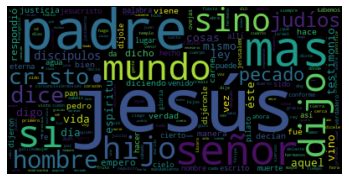

None

In [59]:
nombresnltk=pd.DataFrame(nombres)
contaname=pd.value_counts(nombresnltk[0]).to_frame()
contaname.columns=["conteo"]
contaname.index.name="nombre"
contaname["palabra"]=contaname.index

diccio={}
for freq,name in contaname.values:
    diccio[name]=freq

nube = WordCloud()
nube.generate_from_frequencies(frequencies=diccio)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
figure7=plt.show()
display(figure7)


Vamos a hacer un ejercicio para tratar de identificar los protagonistas del Nuevo Testamento con ayuda de la parte del discurso en Spacy. Usaremos el nombre propio "PROPN". Primero obtenemos el POS

In [60]:
parapos=[]
for x in range(1,len(doc1)):
    parapos.append([ doc1[x].text, doc1[x].lemma_,doc1[x].pos_,doc1[x].is_stop])

basePOS=pd.DataFrame(parapos)
basePOS.head(50)

,0,1,2,3
0,y,y,CCONJ,True
1,griego,griego,ADJ,False
2,,,SPACE,False
3,capítulo,capítulo,NOUN,False
4,,,SPACE,False
5,1,1,NUM,False
6,,,SPACE,False
7,1,1,NUM,False
8,en,en,ADP,True
9,el,el,DET,True


Luego obtenemos solo los nombre propios

In [61]:
solonombre=basePOS[basePOS[2]=="PROPN"]
solonombre.head(50)

,0,1,2,3
20,dios,dios,PROPN,False
26,dios,dios,PROPN,False
36,dios,dios,PROPN,False
103,dios,dios,PROPN,False
109,juan,juan,PROPN,False
152,[,[,PROPN,False
224,dios,dios,PROPN,False
256,mas,mas,PROPN,True
258,dios,dios,PROPN,False
296,juan,juan,PROPN,False


In [62]:
Los contamos y ordenamos de mayor a menor.¿qué limpieza o cambios serían necesarios para mejorar nuestro resultado?

Object `resultado` not found.


In [ ]:
Los contamos y ordenamos de mayor a menor.¿qué limpieza o cambios serían necesarios para mejorar nuestro resultado

In [63]:
countspos=pd.value_counts(solonombre[0]).to_frame().reset_index()
countspos.columns=["nombre","conteo"]
countspos.sort_values("conteo", ascending=False)
countspos.head(30)

,nombre,conteo
0,jesús,243
1,dios,226
2,mas,68
3,[,56
4,],51
5,dícele,36
6,pedro,33
7,simón,21
8,vuestro,21
9,juan,20


Vamos a refinar aún más. Por ejemplo, me puede interesar específicamente cuales son los adjetivos (o descriptores) que se usan cuando se habla de Jesús. Nótese que esto, por ejemplo, podría servir para análisis de marca.
Primero obtengo las oraciones (es decir, utilizo un **token** diferente)

In [64]:
oraciones=[]
for oracion in doc1.sents:
    oraciones.append(oracion.text)
oraciones[0:2]


['hebreo y griego    capítulo  1          1 en el principio era el verbo, y el verbo era con dios, y el verbo era dios.          ',
 '2 este era en el principio con dios.          ']

Luego extraigo solamente las frases que contienen la palabra jesús

In [65]:
frasejesus = [s for s in oraciones if "jesús" in s]
frasejesus[5:10]


['y mirándole jesús, dijo: tú eres simón, hijo de jonás: tú serás llamado cephas (que quiere decir, piedra).          ',
 '43 el siguiente día quiso jesús ir á galilea, y halla á felipe, al cual dijo: sígueme.          ',
 '45 felipe halló á natanael, y dícele: hemos hallado á aquel de quien escribió moisés en la ley, y los profetas: á jesús, el hijo de josé, de nazaret.          ',
 '47 jesús vió venir á sí á natanael, y dijo de él: he aquí un verdadero israelita, en el cual no hay engaño.          ',
 'respondió jesús, y díjole: antes que felipe te llamara, cuando estabas debajo de la higuera te vi.          ']

Extraigo información de spacy, incluyendo el POS

In [66]:
jesus=" ".join(frasejesus)
doc3=nlp(jesus)
partes=[]
for x in range(1,len(doc3)):
    partes.append([ doc3[x].text, doc3[x].lemma_,doc3[x].pos_, doc3[x].ent_type_,doc3[x].is_stop])


##tomo las palabras para extraerlas dependiendo del POS
mibase=pd.DataFrame(partes)
mibase.head(50)


,0,1,2,3,4
0,el,el,DET,,True
1,siguiente,siguiente,ADJ,,True
2,día,día,NOUN,,True
3,ve,ver,VERB,,False
4,juan,juan,PROPN,PER,False
5,á,á,CCONJ,PER,True
6,jesús,jesús,PROPN,PER,False
7,que,que,SCONJ,,True
8,venía,venir,AUX,,False
9,á,á,CCONJ,,True


extraigo solo adjetivos

In [67]:
soloADJ=mibase[mibase[2]=="ADJ"]
soloADJ.head(20)


,0,1,2,3,4
1,siguiente,siguiente,ADJ,,True
76,díceles,díceles,ADJ,,False
105,llamado,llamar,ADJ,,False
118,siguiente,siguiente,ADJ,,True
154,moisés,moisés,ADJ,,False
192,verdadero,verdadero,ADJ,,True
220,higuera,higuera,ADJ,,False
252,tercer,3,ADJ,,False
254,hiciéronse,hiciéronse,ADJ,,False
275,llamado,llamar,ADJ,,False


y finalmente contamos los tokens adjetivos alrededor de jesús

In [68]:
countsad=pd.value_counts(soloADJ[0]).to_frame().reset_index()
countsad.columns=["adjetivo","conteo"]
countsad.sort_values("conteo", ascending=False)
countsad.head(15)


,adjetivo,conteo
0,jesús,23
1,cierto,22
2,mismo,10
3,escrito,5
4,vosotros,4
5,lázaro,4
6,siguiente,4
7,verdadero,4
8,junto,4
9,muerto,3


De hecho es posible ver una estructura muy detallada (aunque no totalmente detallada) de cada oración, y trabajar exactamente con las características sintácticas que se deseen

In [69]:
from spacy import displacy

frasesin=nlp("Yo quisiera saber porqué el jugador hizo tan mala jugada")

frasesin2=nlp("Con este sol lo único que quiero es playa, un ceviche y una helada")


dep=[]
for x in range(0,len(frasesin)):
    dep.append([ frasesin[x].text, frasesin[x].dep_, frasesin[x].head.text])

dep

[['Yo', 'nsubj', 'quisiera'],
 ['quisiera', 'ROOT', 'quisiera'],
 ['saber', 'aux', 'porqué'],
 ['porqué', 'ccomp', 'quisiera'],
 ['el', 'det', 'jugador'],
 ['jugador', 'obj', 'porqué'],
 ['hizo', 'advcl', 'porqué'],
 ['tan', 'advmod', 'mala'],
 ['mala', 'obj', 'hizo'],
 ['jugada', 'obj', 'hizo']]

In [70]:
spacy.explain("advcl")


'adverbial clause modifier'

In [71]:
displacy.render(frasesin2, style='dep', jupyter=True, options={'distance': 90})

Algo interesante es la capacidad de encontrar la relación aun si las palabras están distantes en el espacio (pero no sintácticamente)

In [72]:
frasesbase=nlp("No me gustó la jugada tan mala que el jugador hizo")


dep2=[]
for x in range(0,len(frasesbase)):
    dep2.append([ frasesbase[x].text, frasesbase[x].dep_, frasesbase[x].head.text])
dep2

[['No', 'advmod', 'gustó'],
 ['me', 'obj', 'gustó'],
 ['gustó', 'ROOT', 'gustó'],
 ['la', 'det', 'jugada'],
 ['jugada', 'nsubj', 'gustó'],
 ['tan', 'advmod', 'mala'],
 ['mala', 'amod', 'jugada'],
 ['que', 'mark', 'hizo'],
 ['el', 'det', 'jugador'],
 ['jugador', 'nsubj', 'hizo'],
 ['hizo', 'acl', 'jugada']]

In [73]:
dep3=[]
for x in range(0,len(doc3)):
    dep3.append([ doc3[x].text, doc3[x].dep_, doc3[x].head.text])
depjesus=pd.DataFrame(dep3)
depjesus.head(20)

,0,1,2
0,29,obl,ve
1,el,det,día
2,siguiente,amod,día
3,día,obl,ve
4,ve,ROOT,ve
5,juan,nsubj,ve
6,á,cc,jesús
7,jesús,flat,juan
8,que,nsubj,venía
9,venía,acl,juan


In [74]:
solomod=depjesus[depjesus[1]=="amod"] 
solomod2=solomod[solomod[2]=="jesús"]
countsmod=pd.value_counts(solomod2[0]).to_frame().reset_index()
countsmod.columns=["modificador","conteo"]
countsmod.sort_values("conteo", ascending=False)
countsmod.head(15)

,modificador,conteo
0,cristo,13
1,echado,1
2,cansado,1
3,nazareno,1
4,dicho,1
5,conmovido,1


Obsérvese que, en general, nos habla de conceptos y podría ser útil para su extracción:

In [75]:
solomod.head(30)

,0,1,2
2,siguiente,amod,día
119,siguiente,amod,día
193,verdadero,amod,israelita
253,tercer,amod,día
307,jesús,amod,4
313,contigo,amod,yo
433,mismo,amod,sí
595,pasado,amod,esto
675,cansado,amod,jesús
743,viva,amod,agua


Existe algo más que spacy puede entregarnos: los **noun chunks** o frases nominales, que marcan los objetos, personas, o animales de las que se está hablando. Como veremos, esto es un modelo cuya calidad es también, limitada.

In [76]:
listnouns=[]
for chunk in doc1.noun_chunks:
    listnouns.append(chunk.text)
listnouns[50:70]


['vino',
 'le',
 'mas',
 'le',
 'potestad',
 'hijos',
 'dios',
 'su nombre',
 'los cuales',
 'sangre',
 'voluntad',
 'carne',
 'voluntad',
 'varón',
 'mas',
 'dios',
 'verbo',
 'carne',
 'nosotros',
 'su gloria']